In [40]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv('data/partidos_cebollitas.csv')
df.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [41]:
# Reshape the DataFrame to have one row per team per match

df_local = df[['equipo_local', 'goles_local', 'posesion_local (%)', 'tiros_arco_local']].copy()
df_local = df_local.rename(columns={
    'equipo_local': 'equipo',
    'goles_local': 'goles',
    'posesion_local (%)': 'posesion',
    'tiros_arco_local': 'tiros_arco'
})
df_local['tipo'] = 'local'

df_visitante = df[['equipo_visitante', 'goles_visitante', 'posesion_visitante (%)', 'tiros_arco_visitante']].copy()
df_visitante = df_visitante.rename(columns={
    'equipo_visitante': 'equipo',
    'goles_visitante': 'goles',
    'posesion_visitante (%)': 'posesion',
    'tiros_arco_visitante': 'tiros_arco'
})
df_visitante['tipo'] = 'visitante'

df_teams = pd.concat([df_local, df_visitante], ignore_index=True)

# Normalize 'tiros_arco' using Min-Max Scaling

scaler_norm = MinMaxScaler()
df_teams[['tiros_arco_norm']] = scaler_norm.fit_transform(df_teams[['tiros_arco']])

df_cebollitas = df_teams[df_teams['equipo'] == 'Cebollitas FC']

df_cebollitas.tail(10)

,equipo,goles,posesion,tiros_arco,tipo,tiros_arco_norm
144,Cebollitas FC,0,55,10,visitante,0.777778
150,Cebollitas FC,5,57,5,visitante,0.222222
152,Cebollitas FC,0,46,11,visitante,0.888889
155,Cebollitas FC,5,49,7,visitante,0.444444
169,Cebollitas FC,4,40,5,visitante,0.222222
170,Cebollitas FC,2,50,4,visitante,0.111111
181,Cebollitas FC,3,41,4,visitante,0.111111
183,Cebollitas FC,0,53,4,visitante,0.111111
195,Cebollitas FC,2,48,5,visitante,0.222222
199,Cebollitas FC,3,54,5,visitante,0.222222


In [42]:
# Normalize 'posesion (%)' using  StandardScaler

scaler_std = StandardScaler()

# Create a new column for standardized possession
df_teams['posesion_std'] = scaler_std.fit_transform(df_teams[['posesion']])
df_cebollitas = df_teams[df_teams['equipo'] == 'Cebollitas FC']
df_cebollitas[['posesion', 'posesion_std']].head(10)

,posesion,posesion_std
2,55,0.831833
7,56,0.998199
11,49,-0.166367
20,47,-0.499100
21,53,0.499100
23,46,-0.665466
28,47,-0.499100
29,46,-0.665466
37,57,1.164566
38,52,0.332733


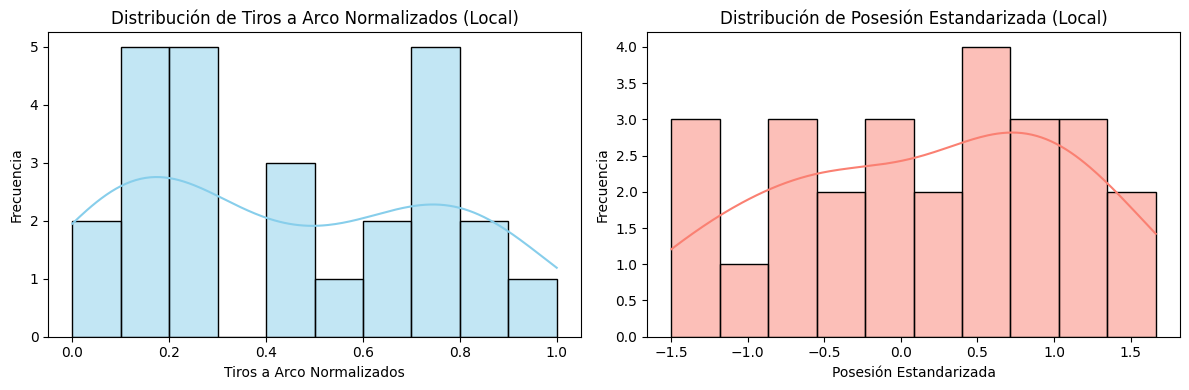

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Cebollitas FC as local team

df_cebollitas_local = df_teams[(df_teams['equipo'] == 'Cebollitas FC') & (df_teams['tipo'] == 'local')]

# Plot distributions of normalized 'tiros_arco' and standardized 'posesion'

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_cebollitas_local['tiros_arco_norm'], bins=10, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribución de Tiros a Arco Normalizados (Local)')
ax[0].set_xlabel('Tiros a Arco Normalizados')
ax[0].set_ylabel('Frecuencia')

sns.histplot(df_cebollitas_local['posesion_std'], bins=10, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribución de Posesión Estandarizada (Local)')
ax[1].set_xlabel('Posesión Estandarizada')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

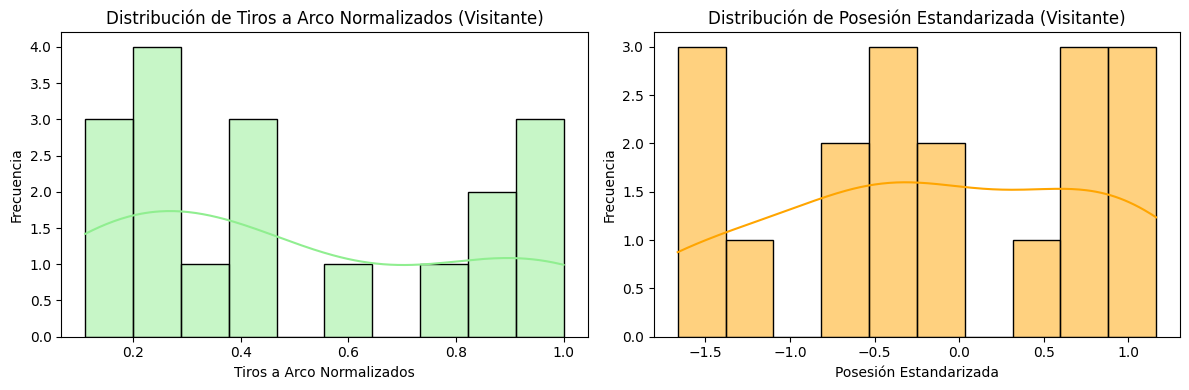

In [45]:
df_cebollitas_local = df_teams[(df_teams['equipo'] == 'Cebollitas FC') & (df_teams['tipo'] == 'visitante')]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_cebollitas_local['tiros_arco_norm'], bins=10, kde=True, ax=ax[0], color='lightgreen')
ax[0].set_title('Distribución de Tiros a Arco Normalizados (Visitante)')
ax[0].set_xlabel('Tiros a Arco Normalizados')
ax[0].set_ylabel('Frecuencia')
sns.histplot(df_cebollitas_local['posesion_std'], bins=10, kde=True, ax=ax[1], color='orange')
ax[1].set_title('Distribución de Posesión Estandarizada (Visitante)')
ax[1].set_xlabel('Posesión Estandarizada')
ax[1].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()